In [1]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
#reading the dataset file
df = pd.read_csv("C:/Users/HP PRO/Desktop/python/Federal.csv")

In [3]:
df.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.240,7.190,5.700,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.000,14.000,14.000,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.000,5.000,4.370,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.570,11.790,4.180,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.630,2.740,2.020,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [4]:
#creating a list of name of columns
variables = df.columns.tolist()

In [5]:
#dropping those columns where summ of null values is >50
for i in variables:
    if df[i].isnull().sum() > 50:
        df = df.drop([i], axis = 1)
df = df.drop(['A) Brief Description'], axis = 1)
df.head()

,Index Number,Investment Name,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.240,7.190,5.700,General STEM,Institutional Capacity: Support advancement an...,NaN,No,No,Don't know
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.000,14.000,14.000,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.000,5.000,4.370,General STEM,Institutional Capacity: Support advancement an...,NaN,No,No,Don't know
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.570,11.790,4.180,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.630,2.740,2.020,General STEM,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,No,No,Don't know


In [6]:
#calculating how many null values in a column
df.isnull().sum()

Index Number                                    1
Investment Name                                 1
Agency                                          1
Subagency                                      16
B) Year Established                            12
 C1) Funding FY2008                            22
 C2) Funding FY2009                             9
 C3) Funding FY2010                             0
D) Mission-specific or General STEM?            1
F1) Primary Investment Objective                1
I1) STEM Learners Targeted? Specify.           44
J) Focus on Underrepresented Groups in STEM     1
K) Eligibility Restrictions                     1
Q) Legislation Required to Shift Focus?         2
dtype: int64

In [7]:
#renaming some of the column namess
df = df.rename(columns={'Index Number': 'ID', 'Investment Name': 'IN', 'A) Brief Description': 'BD', 'B) Year Established':'YE', ' C1) Funding FY2008 ': 'F2008', ' C2) Funding FY2009 ': 'F2009', ' C3) Funding FY2010 ': 'F2010'})

In [8]:
df.head()

,ID,IN,Agency,Subagency,YE,F2008,F2009,F2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.240,7.190,5.700,General STEM,Institutional Capacity: Support advancement an...,NaN,No,No,Don't know
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.000,14.000,14.000,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.000,5.000,4.370,General STEM,Institutional Capacity: Support advancement an...,NaN,No,No,Don't know
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.570,11.790,4.180,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.630,2.740,2.020,General STEM,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,No,No,Don't know


In [9]:
#removing the " ", "-" and "," from numerical data
df['F2009'] = pd.DataFrame(df['F2009'].str.replace(" ",""))
df['F2008'] = pd.DataFrame(df['F2008'].str.replace(",",""))
df['F2009'] = pd.DataFrame(df['F2009'].str.replace(",",""))
df['F2010'] = pd.DataFrame(df['F2010'].str.replace(",",""))
df['F2008'] = pd.DataFrame(df['F2008'].str.replace("-","0"))
df['F2009'] = pd.DataFrame(df['F2009'].str.replace("-","0"))
df['F2010'] = pd.DataFrame(df['F2010'].str.replace("-","0"))

In [10]:
#converting the Funding columns from string to float for calculation
df['F2008'] = df['F2008'].astype(float)
df['F2009'] = df['F2009'].astype(float)
df['F2010'] = df['F2010'].astype(float)

In [11]:
#Filling up the NaN values

#calculating maximum number of instances in a column and then filling that value inplace of NaN
median08 = df['F2008'].median()
median09 = df['F2009'].median()
median10 = df['F2010'].median()
maxin = df['IN'].value_counts().max()
maxag = df['Agency'].value_counts().max()
maxF1 = df['F1) Primary Investment Objective'].value_counts().max()
maxD = df['D) Mission-specific or General STEM?'].value_counts().max()
maxJ = df['J) Focus on Underrepresented Groups in STEM'].value_counts().max()
maxK = df['K) Eligibility Restrictions'].value_counts().max()
maxQ = df['Q) Legislation Required to Shift Focus?'].value_counts().max()

In [12]:
#now filling the calculated values
df['F2008'] = df['F2008'].fillna(median08)
df['F2009'] = df['F2009'].fillna(median09)
df['F2010'] = df['F2010'].fillna(median10)
df['ID'] = df['ID'].fillna('PRG_0328')
df['IN'] = df['IN'].fillna(maxin)
df['Agency'] = df['Agency'].fillna(maxag)
df['F1) Primary Investment Objective'] = df['F1) Primary Investment Objective'].fillna(maxF1)
df['D) Mission-specific or General STEM?'] = df['D) Mission-specific or General STEM?'].fillna(maxD)
df['J) Focus on Underrepresented Groups in STEM'] = df['J) Focus on Underrepresented Groups in STEM'].fillna(maxJ)
df['K) Eligibility Restrictions'] = df['K) Eligibility Restrictions'].fillna(maxK)
df['Q) Legislation Required to Shift Focus?'] = df['Q) Legislation Required to Shift Focus?'].fillna(maxQ)

In [13]:
df.head()

,ID,IN,Agency,Subagency,YE,F2008,F2009,F2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.24,7.19,5.70,General STEM,Institutional Capacity: Support advancement an...,NaN,No,No,Don't know
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.00,5.00,4.37,General STEM,Institutional Capacity: Support advancement an...,NaN,No,No,Don't know
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,No,No,Don't know


In [14]:
sum08 = df['F2008'].values.sum()
sum09 = df['F2009'].values.sum()

In [15]:
sum08

5638.7079999999996

In [16]:
sum09

6728.6829999999991

In [17]:
df.isnull().sum()

ID                                              0
IN                                              0
Agency                                          0
Subagency                                      16
YE                                             12
F2008                                           0
F2009                                           0
F2010                                           0
D) Mission-specific or General STEM?            0
F1) Primary Investment Objective                0
I1) STEM Learners Targeted? Specify.           44
J) Focus on Underrepresented Groups in STEM     0
K) Eligibility Restrictions                     0
Q) Legislation Required to Shift Focus?         0
dtype: int64

In [18]:
#calculating the total % growth of funds between 2008 and 2009
percent_growth = ((sum09 - sum08)/(sum08))*100
print("Total Percent growth of funds between 2008 and 2009 is: ",percent_growth,"%")

Total Percent growth of funds between 2008 and 2009 is:  19.3302260021 %


In [19]:
val08 = df['F2008'].values.tolist()
val09 = df['F2009'].values.tolist()
targetlist = []

In [20]:
#calculating the % growth between 2008 and 2009 year and creating a new Target Variable
length = len(val08)
for i in range(0, length):
    netfund = (val09[i] - val08[i])
    if netfund >= 0:
        targetlist.append(1)
    else:
        targetlist.append(0)
        
tempdf = pd.DataFrame(targetlist, columns={'targetv'})

In [21]:
df = pd.concat([tempdf, df], axis = 1)

In [22]:
df = df.dropna()
df.isnull().sum()

targetv                                        0
ID                                             0
IN                                             0
Agency                                         0
Subagency                                      0
YE                                             0
F2008                                          0
F2009                                          0
F2010                                          0
D) Mission-specific or General STEM?           0
F1) Primary Investment Objective               0
I1) STEM Learners Targeted? Specify.           0
J) Focus on Underrepresented Groups in STEM    0
K) Eligibility Restrictions                    0
Q) Legislation Required to Shift Focus?        0
dtype: int64

In [23]:
df.head()

#stage 1 ends here

,targetv,ID,IN,Agency,Subagency,YE,F2008,F2009,F2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
1,1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
3,1,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
4,1,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,No,No,Don't know
6,1,PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),1995.0,1.10,1.12,1.10,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,No,No,Don't know
7,1,PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,1952.0,96.02,162.43,136.13,General STEM,Post-Secondary STEM Degrees: Increase the numb...,Pre-K-20 learners,No,Yes,Don't know


In [24]:
#stage 2 starts from here
sns.set(font_scale=1.5)

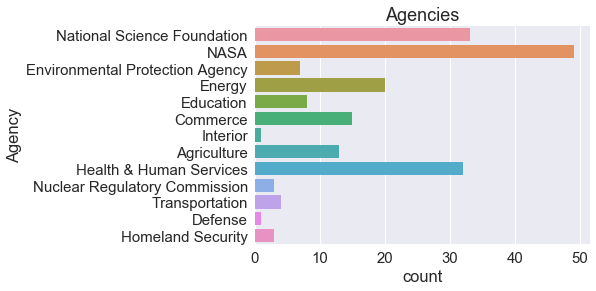

In [25]:
sns.countplot(y = df['Agency']).set_title("Agencies")
plt.show()

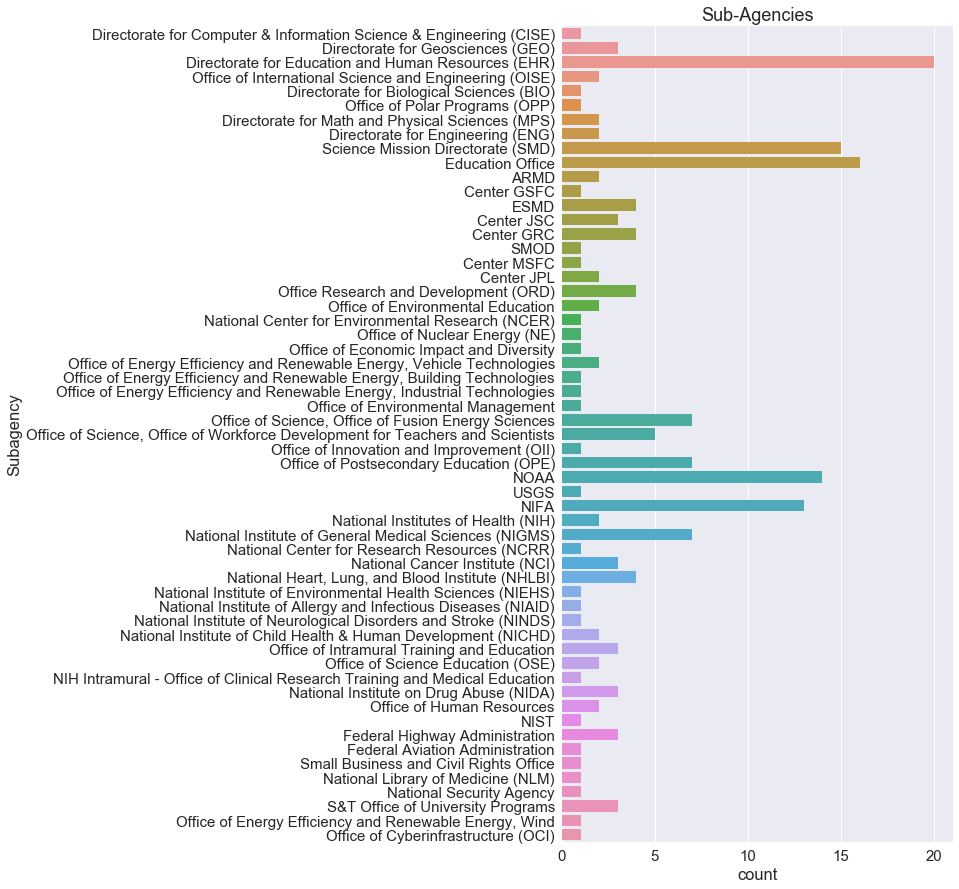

In [26]:
plt.subplots(figsize=(7,15))
sns.countplot(y = df['Subagency']).set_title("Sub-Agencies")
plt.show()

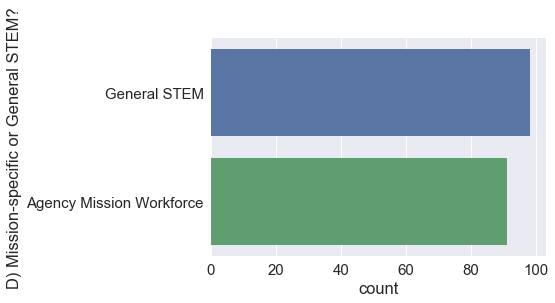

In [27]:
sns.countplot(y = df['D) Mission-specific or General STEM?']).set_title("")
plt.show()

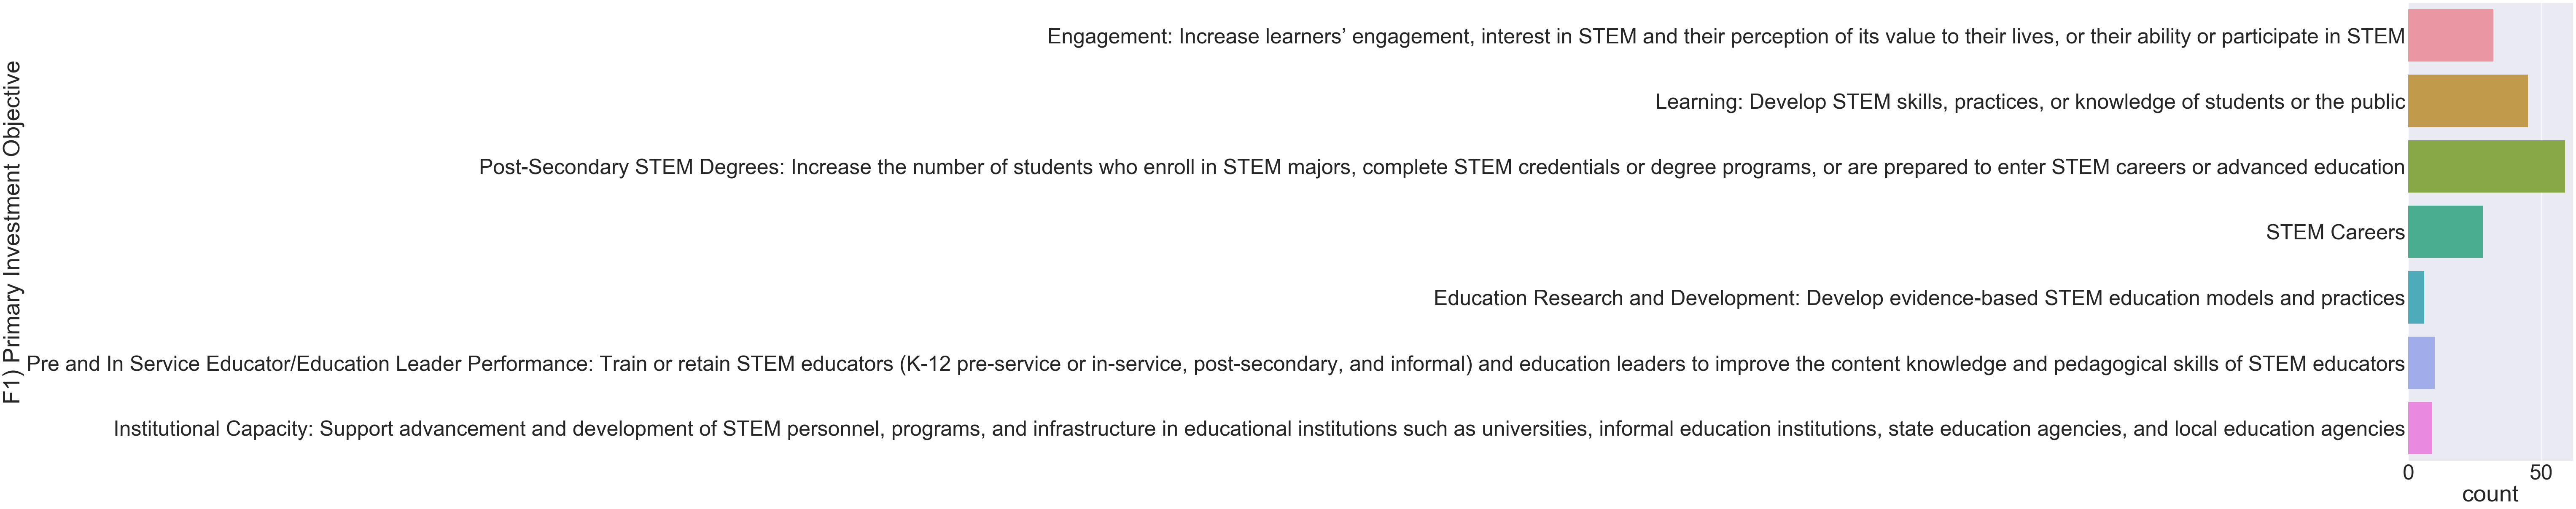

In [28]:
sns.set(font_scale=5.0)
plt.subplots(figsize=(7,20))
sns.countplot(y = df['F1) Primary Investment Objective']).set_title("")
plt.show()

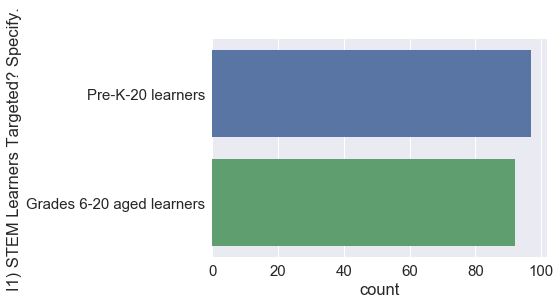

In [29]:
sns.set(font_scale=1.5)
sns.countplot(y = df['I1) STEM Learners Targeted? Specify.']).set_title("")
plt.show()

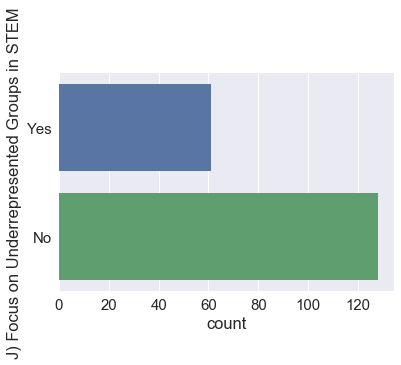

In [30]:
sns.countplot(y = df['J) Focus on Underrepresented Groups in STEM']).set_title("")
plt.show()

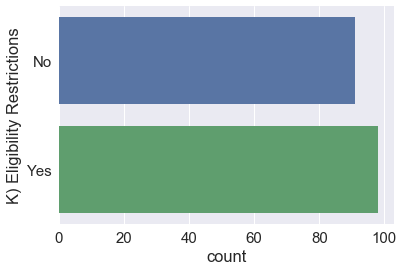

In [31]:
sns.countplot(y = df['K) Eligibility Restrictions']).set_title("")
plt.show()

In [32]:
df.head()

,targetv,ID,IN,Agency,Subagency,YE,F2008,F2009,F2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
1,1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
3,1,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
4,1,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,No,No,Don't know
6,1,PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),1995.0,1.10,1.12,1.10,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,No,No,Don't know
7,1,PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,1952.0,96.02,162.43,136.13,General STEM,Post-Secondary STEM Degrees: Increase the numb...,Pre-K-20 learners,No,Yes,Don't know


In [33]:
df.dtypes

targetv                                          int64
ID                                              object
IN                                              object
Agency                                          object
Subagency                                       object
YE                                             float64
F2008                                          float64
F2009                                          float64
F2010                                          float64
D) Mission-specific or General STEM?            object
F1) Primary Investment Objective                object
I1) STEM Learners Targeted? Specify.            object
J) Focus on Underrepresented Groups in STEM     object
K) Eligibility Restrictions                     object
Q) Legislation Required to Shift Focus?         object
dtype: object

In [34]:
variables = df.columns.tolist()
mis = []
for i in variables:
    if df[i].dtypes == object:
        mis.append(mutual_info_score(df['targetv'],df[i]))
        print("Mutual info score of df['targetv'] and df['",i,"'] is: ",mutual_info_score(df['targetv'],df[i]))
        
#stage 2 ends here

Mutual info score of df['targetv'] and df[' ID '] is:  0.566652871849
Mutual info score of df['targetv'] and df[' IN '] is:  0.566652871849
Mutual info score of df['targetv'] and df[' Agency '] is:  0.0703637252895
Mutual info score of df['targetv'] and df[' Subagency '] is:  0.20665360279
Mutual info score of df['targetv'] and df[' D) Mission-specific or General STEM? '] is:  0.00132206118688
Mutual info score of df['targetv'] and df[' F1) Primary Investment Objective '] is:  0.0299726662759
Mutual info score of df['targetv'] and df[' I1) STEM Learners Targeted? Specify. '] is:  0.00165811409381
Mutual info score of df['targetv'] and df[' J) Focus on Underrepresented Groups in STEM '] is:  0.00711317151401
Mutual info score of df['targetv'] and df[' K) Eligibility Restrictions '] is:  0.000365704367359
Mutual info score of df['targetv'] and df[' Q) Legislation Required to Shift Focus? '] is:  0.0334470722819


In [35]:
df.head()

,targetv,ID,IN,Agency,Subagency,YE,F2008,F2009,F2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
1,1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
3,1,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,Don't know
4,1,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,No,No,Don't know
6,1,PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),1995.0,1.10,1.12,1.10,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,No,No,Don't know
7,1,PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,1952.0,96.02,162.43,136.13,General STEM,Post-Secondary STEM Degrees: Increase the numb...,Pre-K-20 learners,No,Yes,Don't know


In [36]:
#stage 3 starts from here 
tdf = df
for i in variables:
    if tdf[i].dtypes == object:
        tdf[i] = tdf[i].astype('category')
        tdf[i] = tdf[i].cat.codes
tdf.head()

,targetv,ID,IN,Agency,Subagency,YE,F2008,F2009,F2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,Q) Legislation Required to Shift Focus?
1,1,0,17,10,7,2006.0,14.00,14.00,14.00,1,1,1,1,0,0
3,1,1,132,10,10,2002.0,4.57,11.79,4.18,1,1,1,1,0,0
4,1,2,56,10,10,1999.0,1.63,2.74,2.02,1,3,1,0,0,0
6,1,3,58,10,10,1995.0,1.10,1.12,1.10,1,1,1,0,0,0
7,1,4,62,10,8,1952.0,96.02,162.43,136.13,1,4,1,0,1,0


In [37]:
#splitting training and testing data
y = df['targetv']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [38]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
y_predict = xg.predict(X_test)
y_predict

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [40]:
print("Score:",xg.score(X_test, y_test))

Score: 1.0
